## News Articles summarization Testing 3
### Anant




 

 


## 1 Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
import re
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import string
from string import punctuation
from nltk.corpus import stopwords
from statistics import mean
from heapq import nlargest
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))
punctuation = punctuation + '\n' + '—' + '“' + ',' + '”' + '‘' + '-' + '’'
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df_1 = pd.read_csv("/kaggle/input/all-the-news/articles1.csv")
df_2 = pd.read_csv("/kaggle/input/all-the-news/articles2.csv")
df_3 = pd.read_csv("/kaggle/input/all-the-news/articles3.csv")

In [3]:
# Checking if the columns are same or not
df_1.columns == df_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [4]:
# Checking if the columns are same or not
df_2.columns == df_3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [5]:
# Making one Dataframe by appending all of them for the further process
d = [df_1, df_2, df_3]
df = pd.concat(d, keys = ['x', 'y', 'z'])
df.rename(columns = {'content' : 'article'}, inplace = True);

In [6]:
df.head()

Unnamed: 0     id                                              title  \
x 0           0  17283  House Republicans Fret About Winning Their Hea...   
  1           1  17284  Rift Between Officers and Residents as Killing...   
  2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
  3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
  4           4  17287  Kim Jong-un Says North Korea Is Preparing to T...   

        publication                         author        date    year  month  \
x 0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
  1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
  2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   
  3  New York Times               William McDonald  2017-04-10  2017.0    4.0   
  4  New York Times                  Choe Sang-Hun  2017-01-02  2017.0    1.0   

     url                                            article  
x 0  NaN  WASHINGTON  —   Congressional Republicans have...  
  1  NaN  After the bullet shells get counted, the blood...  
  2  NaN  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  NaN  Death may be the great equalizer, but it isn’t...  
  4  NaN  SEOUL, South Korea  —   North Korea’s leader, ...

In [7]:
df.sample(2)

,,Unnamed: 0,id,title,publication,author,date,year,month,url,article
y,43181,96640,142815,Tito Jackson remembers Michael putting butter ...,New York Post,Hardeep Phull,2016-06-17,2016.0,6.0,http://nypost.com/2016/06/17/tito-jackson-reme...,"For nearly half a century, have mined hits a..."
x,1108,1108,18538,Shopping Becomes a Political Act in the Trump ...,New York Times,Julie Creswell and Rachel Abrams,2017-02-10,2017.0,2.0,NaN,"A couple of weeks ago, people boycotted Nordst..."


In [8]:
df.tail()

Unnamed: 0      id  \
z 42566      146028  218078   
  42567      146029  218079   
  42568      146030  218080   
  42569      146031  218081   
  42570      146032  218082   

                                                     title      publication  \
z 42566  An eavesdropping Uber driver saved his 16-year...  Washington Post   
  42567  Plane carrying six people returning from a Cav...  Washington Post   
  42568  After helping a fraction of homeowners expecte...  Washington Post   
  42569  Yes, this is real: Michigan just banned bannin...  Washington Post   
  42570  What happened in Washington state after voters...  Washington Post   

                       author        date    year  month  \
z 42566              Avi Selk  2016-12-30  2016.0   12.0   
  42567         Sarah Larimer  2016-12-30  2016.0   12.0   
  42568           Renae Merle  2016-12-30  2016.0   12.0   
  42569        Chelsea Harvey  2016-12-30  2016.0   12.0   
  42570  Christopher Ingraham  2016-12-29  2016.0   12.0   

                                                       url  \
z 42566  https://web.archive.org/web/20161231004909/htt...   
  42567  https://web.archive.org/web/20161231004909/htt...   
  42568  https://web.archive.org/web/20161231004909/htt...   
  42569  https://web.archive.org/web/20161231004909/htt...   
  42570  https://web.archive.org/web/20161231004909/htt...   

                                                   article  
z 42566           Uber driver Keith Avila picked up a p...  
  42567           Crews on Friday continued to search L...  
  42568       When the Obama administration announced a...  
  42569       This story has been updated. A new law in...  
  42570       The nation’s first recreational marijuana...

In [9]:
# Shape of the dataset
print ("The shape of the dataset : ", df.shape)

The shape of the dataset :  (142570, 10)


In [10]:
# Dropping the unnecessary columns
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

id                                              title     publication  \
x 0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
  1  17284  Rift Between Officers and Residents as Killing...  New York Times   
  2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
  3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
  4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                            author        date    year  month  url  \
x 0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
  1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
  2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
  3               William McDonald  2017-04-10  2017.0    4.0  NaN   
  4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   

                                               article  
x 0  WASHINGTON  —   Congressional Republicans have...  
  1  After the bullet shells get counted, the blood...  
  2  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  Death may be the great equalizer, but it isn’t...  
  4  SEOUL, South Korea  —   North Korea’s leader, ...

[Text(0.5, 0, 'Publication'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Publication according')]

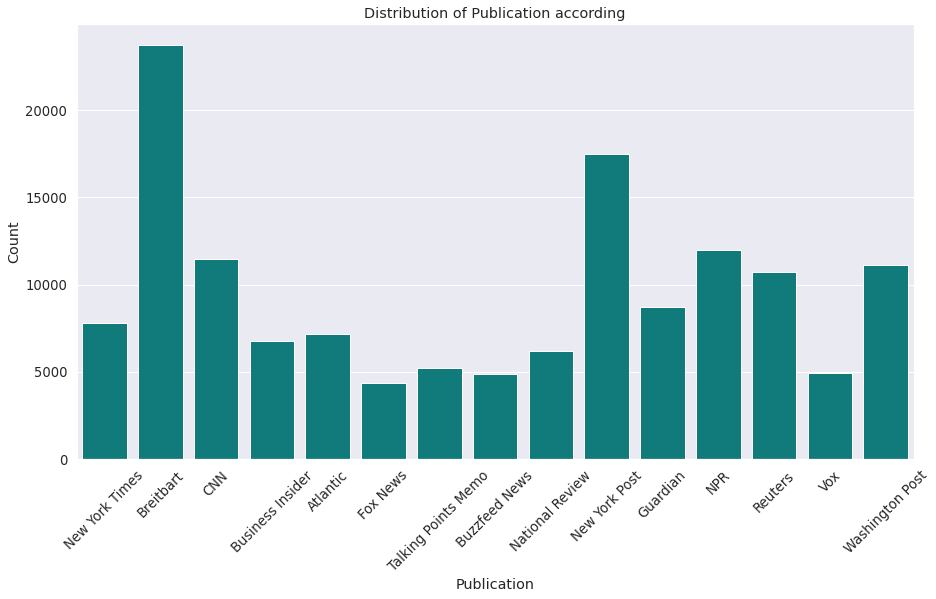

In [11]:
# Countplot shows the distribution of Publication
plt.rcParams['figure.figsize'] = [15, 8]
sns.set(font_scale = 1.2, style = 'darkgrid')
sns_year = sns.countplot(df['publication'], color = 'darkcyan')
plt.xticks(rotation=45)
sns_year.set(xlabel = "Publication", ylabel = "Count", title = "Distribution of Publication according")

# 2 Exploratory Data Analysis

In [12]:
# Replacing the unnecessary row value of year with it's actual values
df['year'] = df['year'].replace("https://www.washingtonpost.com/outlook/tale-of-a-woman-who-died-and-a-woman-who-killed-in-the-northern-ireland-conflict/2019/03/08/59e75dd4-2ecd-11e9-8ad3-9a5b113ecd3c_story.html", 2019)

In [13]:
# Years
df['year'].value_counts()

2016.0    85405
2017.0    50404
2015.0     3705
2013.0      228
2014.0      125
2012.0       34
2011.0        8
2010.0        6
2008.0        3
2009.0        3
2004.0        2
2003.0        2
2005.0        2
2007.0        1
2000.0        1
Name: year, dtype: int64

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of the articles according to the year')]

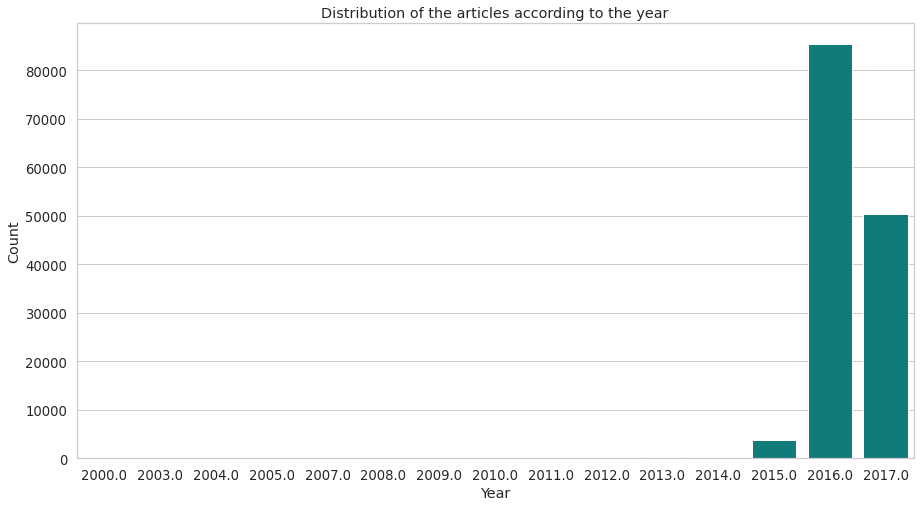

In [14]:
# Countplot shows the distribution of the articles according to the year
plt.rcParams['figure.figsize'] = [15, 8]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_year = sns.countplot(df['year'], color = 'darkcyan')
sns_year.set(xlabel = "Year", ylabel = "Count", title = "Distribution of the articles according to the year")

In [15]:
# Authors
df['author'].value_counts()

Breitbart News                        1559
Pam Key                               1282
Associated Press                      1231
Charlie Spiering                       928
Jerome Hudson                          806
                                      ... 
Nadia Berenstein                         1
Faiz Shakir                              1
Lia Eustachewich and Kevin Dugan         1
Daniel Prendergast and Chris Perez       1
Jihye Lee                                1
Name: author, Length: 15647, dtype: int64

[Text(0.5, 21.200000000000003, 'count'),
 Text(21.200000000000003, 0.5, 'author'),
 Text(0.5, 1.0, 'the most freq author')]

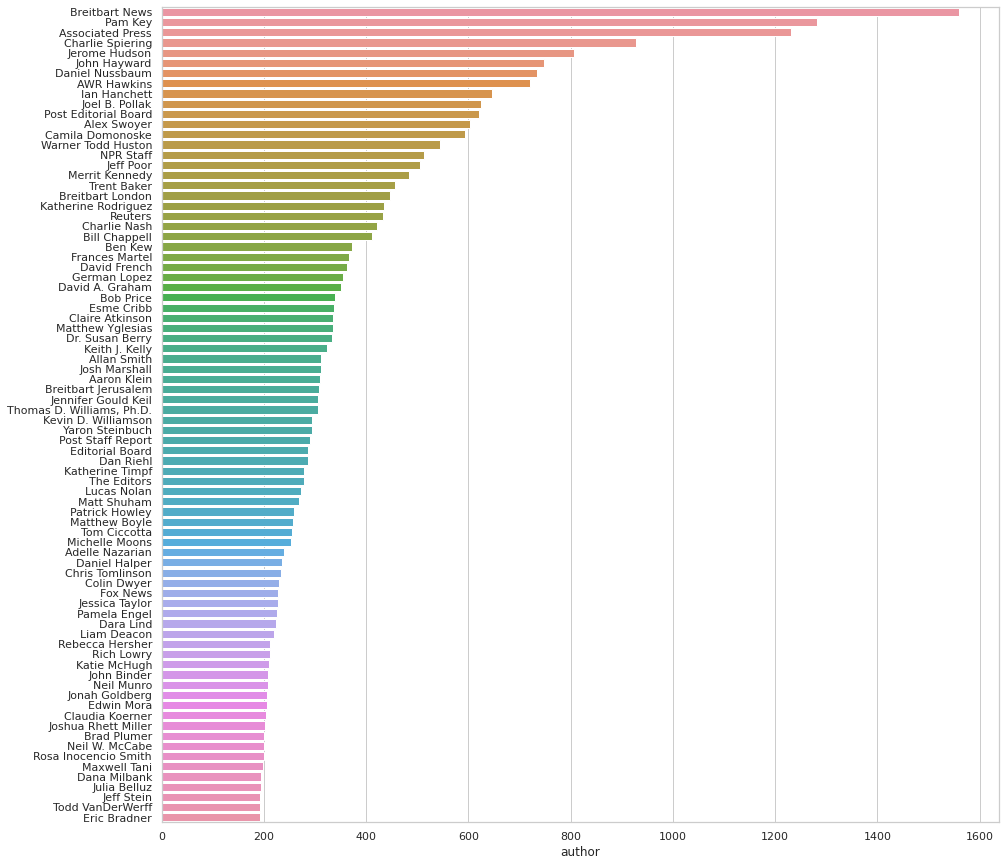

In [16]:
# Countplot shows the distribution of author
plt.rcParams['figure.figsize'] = [15, 15]
sns.set(font_scale = 1, style = 'whitegrid')
df_author = df.author.value_counts().head(80)

sns.barplot(df_author,df_author.index)
sns_year.set(xlabel = "count", ylabel = "author", title = "the most freq author")

In [17]:
# Changing the value "The Associated Press" to "Associated Press"
df['author'] = df['author'].replace("The Associated Press", "Associated Press")

# 3 Making the Article Summarizer

In [18]:
contractions_dict = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"doesn’t": "does not",
"don't": "do not",
"don’t": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y’all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he had",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’re": "you are",
"you’ve": "you have",
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
# Function to clean the html from the article
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

# Function expand the contractions if there's any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

# Function to preprocess the articles
def preprocessing(article):
    global article_sent
    
    # Converting to lowercase
    article = article.str.lower()
    
    # Removing the HTML
    article = article.apply(lambda x: cleanhtml(x))
    
    # Removing the email ids
    article = article.apply(lambda x: re.sub('\S+@\S+','', x))
    
    # Removing The URLS
    article = article.apply(lambda x: re.sub("((http\://|https\://|ftp\://)|(www.))+(([a-zA-Z0-9\.-]+\.[a-zA-Z]{2,4})|([0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}))(/[a-zA-Z0-9%:/-_\?\.'~]*)?",'', x))
    
    # Removing the '\xa0'
    article = article.apply(lambda x: x.replace("\xa0", " "))
    
    # Removing the contractions
    article = article.apply(lambda x: expand_contractions(x))
    
    # Stripping the possessives
    article = article.apply(lambda x: x.replace("'s", ''))
    article = article.apply(lambda x: x.replace('’s', ''))
    article = article.apply(lambda x: x.replace("\'s", ''))
    article = article.apply(lambda x: x.replace("\’s", ''))
    
    # Removing the Trailing and leading whitespace and double spaces
    article = article.apply(lambda x: re.sub(' +', ' ',x))
    
    # Copying the article for the sentence tokenization
    article_sent = article.copy()
    
    # Removing punctuations from the article
    article = article.apply(lambda x: ''.join(word for word in x if word not in punctuation))
    
    # Removing the Trailing and leading whitespace and double spaces again as removing punctuation might
    # Lead to a white space
    article = article.apply(lambda x: re.sub(' +', ' ',x))
    
    # Removing the Stopwords
    article = article.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
    
    return article

# Function to normalize the word frequency which is used in the function word_frequency
def normalize(li_word):
    global normalized_freq
    normalized_freq = []
    for dictionary in li_word:
        max_frequency = max(dictionary.values())
        for word in dictionary.keys():
            dictionary[word] = dictionary[word]/max_frequency
        normalized_freq.append(dictionary)
    return normalized_freq

# Function to calculate the word frequency
def word_frequency(article_word):
    word_frequency = {}
    li_word = []
    for sentence in article_word:
        for word in word_tokenize(sentence):
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
        li_word.append(word_frequency)
        word_frequency = {}
    normalize(li_word)
    return normalized_freq

# Function to Score the sentence which is called in the function sent_token
def sentence_score(li):
    global sentence_score_list
    sentence_score = {}
    sentence_score_list = []
    for list_, dictionary in zip(li, normalized_freq):
        for sent in list_:
            for word in word_tokenize(sent):
                if word in dictionary.keys():
                    if sent not in sentence_score.keys():
                        sentence_score[sent] = dictionary[word]
                    else:
                        sentence_score[sent] += dictionary[word]
        sentence_score_list.append(sentence_score)
        sentence_score = {}
    return sentence_score_list

# Function to tokenize the sentence
def sent_token(article_sent):
    sentence_list = []
    sent_token = []
    for sent in article_sent:
        token = sent_tokenize(sent)
        for sentence in token:
            token_2 = ''.join(word for word in sentence if word not in punctuation)
            token_2 = re.sub(' +', ' ',token_2)
            sent_token.append(token_2)
        sentence_list.append(sent_token)
        sent_token = []
    sentence_score(sentence_list)
    return sentence_score_list

# Function which generates the summary of the articles (This uses the 20% of the sentences with the highest score)
def summary(sentence_score_OwO):
    summary_list = []
    for summ in sentence_score_OwO:
        select_length = int(len(summ)*0.25)
        summary_ = nlargest(select_length, summ, key = summ.get)
        summary_list.append(".".join(summary_))
    return summary_list


# Functions to change the article string (if passed) to change it to generate a pandas series
def make_series(art):
    global dataframe
    data_dict = {'article' : [art]}
    dataframe = pd.DataFrame(data_dict)['article']
    return dataframe

# Function which is to be called to generate the summary which in further calls other functions alltogether
def article_summarize(artefact):
    
    if type(artefact) != pd.Series:
        artefact = make_series(artefact)
    
    df = preprocessing(artefact)
    
    word_normalization = word_frequency(df)
    
    sentence_score_OwO = sent_token(article_sent)
    
    summarized_article = summary(sentence_score_OwO)
    
    return summarized_article

In [19]:
# Generating the Word Cloud of the article using the preprocessing and make_series function mentioned below
def word_cloud(art):
    art_ = make_series(art)
    OwO = preprocessing(art_)
    wordcloud_ = WordCloud(height = 500, width = 1000, background_color = 'white').generate(art)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off');
# Generating the summaries for the first 100 articles
summaries = article_summarize(df['article'][0:100])

In [20]:
print ("The Actual length of the article is : ", len(df['article'][1]))
df['article'][1]

The Actual length of the article is :  27834


'After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from   windows and see crime scenes gone cold: a band of yellow police tape blowing in the breeze. The South Bronx, just across the Harlem River from Manhattan and once shorthand for urban dysfunction, still suffers violence at levels long ago slashed in many other parts of New York City. And yet the city’s efforts to fight it remain splintered, underfunded and burdened by scandal. In the 40th Precinct, at the southern tip of the Bronx, as in other poor, minority neighborhoods across the country, people long hounded for   infractions are crying out for more protection against grievous injury or death. By September, four of every five shootings in the precinct this year were unsolved. Out of the city’s 77 precincts, the 40th has the highest murder rate but the fewest detectives per violent crime, reflecting disparities in staffing that hit hardest in some neighborhoods outside Manhatt

In [21]:
print ("The length of the summarized article is : ", len(summaries[1]))
summaries[1]

The length of the summarized article is :  10919


'even as the police department has hired 1 300 more officers for neighborhood policing and counterterrorism officers in the 40th precinct said they could still rush to 25 911 calls during a shift a number unchanged from what the new police commissioner james p oneill said he was handling in a similar south bronx precinct 15 years ago. sergeant lopuzzo who turned down a more prestigious post to stay in the 40th precinct said that his squad worked tirelessly to handle cases with the people he had and that while every squad wanted more detectives staffing needs for counterterrorism units and task forces had created new deployment challenges across the department.by contrast a detective in the precinct on the southern end of staten island carries nine such cases a detective in the precinct patrolling union square and gramercy park handles 16 and a detective in the precinct for most of washington heights handles 32 the citywide median.presented with the times analysis of confidential staffi

In [22]:
!pip install rouge

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [23]:
print('anant')

anant


In [24]:
from rouge import Rouge
rouge = Rouge()

reference_summary = df['article'][1]
predicted_summary = summaries[1]

scores = rouge.get_scores(predicted_summary, reference_summary)
print("ROUGE Score:")
print("Precision: {:.2f}".format(scores[0]['rouge-1']['p']))
print("Recall: {:.2f}".format(scores[0]['rouge-1']['r']))
print("F1-Score: {:.2f}".format(scores[0]['rouge-1']['f']))

ROUGE Score:
Precision: 0.87
Recall: 0.36
F1-Score: 0.51


In [25]:
!pip install -U nltk

     |████████████████████████████████| 1.5 MB 2.1 MB/s 
     |████████████████████████████████| 757 kB 54.6 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2020.11.13
    Uninstalling regex-2020.11.13:
      Successfully uninstalled regex-2020.11.13
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [26]:
from nltk.translate.bleu_score import sentence_bleu

def summary_to_sentences(summary):
    # Split the summary into sentences using the '.' character as a separator
    sentences = summary.split('.')
    
    # Convert each sentence into a list of words
    sentence_lists = [sentence.split() for sentence in sentences]
    
    return sentence_lists

def paragraph_to_wordlist(paragraph):
    # Split the paragraph into words using whitespace as a separator
    words = paragraph.split()
    return words

reference_paragraph = df['article'][1]
reference_summary = summary_to_sentences(reference_paragraph)
predicted_paragraph = summaries[1]
predicted_summary = paragraph_to_wordlist(predicted_paragraph)



score = sentence_bleu(reference_summary, predicted_summary)
print("BLEU Score: {:.2f}".format(score))

BLEU Score: 0.49
